## 4.1. 사이킷런 모형 평가 방법

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

## 4.4. Confusion Matrix 분류 결과표

In [ ]:
import numpy as np
table = np.array([[1613, 22],
                  [  81, 77]])
table

array([[1613,   22],
       [  81,   77]])

## 4.5. 분류표 API

In [ ]:
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2]
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 1]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]])

In [ ]:
import pandas as pd
df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
pd.crosstab(df.y_true, df.y_pred, margins=True)

y_pred,0,1,2,All
y_true,,,,
0,2,1,0,3
1,1,2,0,3
2,0,2,1,3
All,3,5,1,9


## 4.6. 혼돈 행렬을 이용한 평가 방법

In [ ]:
def fmeasure(table) :
    precision = table[1, 1] / (table[0, 1] + table[1, 1]) # TP/(FP+TP)
    recall = table[1, 1] / (table[1, 0] + table[1, 1]) # TP/(FN+TP)
    return (2 * precision * recall / (precision + recall))

In [ ]:
import numpy as np
table = np.array([[1613, 22],
                  [  81, 77]])
fmeasure(table)

0.5992217898832685

In [ ]:
import pandas as pd
result = pd.read_csv('http://javaspecialist.co.kr/pds/382')
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [ ]:
import pandas as pd
table = pd.crosstab(result.y_true, result.y_pred, margins=True)
table

y_pred,0,1,All
y_true,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


### 4.6.1. Accuracy(정확도)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

### 4.6.2. Precision(정밀도)

In [ ]:
from sklearn.metrics import precision_score
precision_score(result.y_true, result.y_pred)

0.7777777777777778

### 4.6.3. Recall(재현율)

In [ ]:
from sklearn.metrics import recall_score
recall_score(result.y_true, result.y_pred)

0.4873417721518987

### 4.6.4. Specificity(특이도)

In [ ]:
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

### 4.6.5. Fall-Out(위양성률)

In [ ]:
specificity = recall_score(result.y_true, result.y_pred, pos_label=0)
fallout = 1-specificity
fallout

0.013455657492354778

### 4.6.6. F(beta) score

In [ ]:
from sklearn.metrics import f1_score
f1_score(result.y_true, result.y_pred)

0.5992217898832685

### 4.6.7. classification_report

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### 4.7. ROC와 AUC


### 4.7.1. ROC 커브

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)

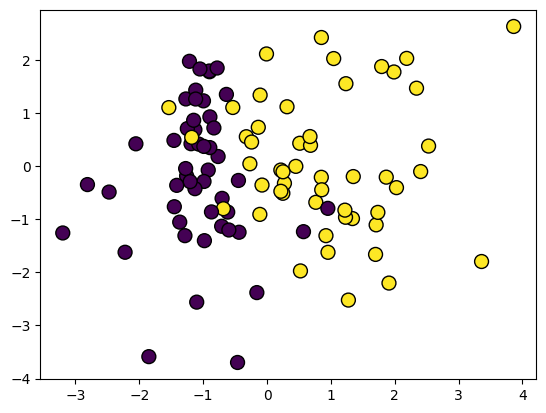

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X,y)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr_model.predict(X)
f_value = lr_model.decision_function(X)

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.c_[f_value, y_pred, y], columns=['f_value', 'y_pred', 'y_true'])
df.sort_values('f_value', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,f_value,y_pred,y_true
0,11.454496,1.0,1.0
1,8.170554,1.0,1.0
2,7.143225,1.0,1.0
3,7.111102,1.0,1.0
4,7.018470,1.0,1.0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[48,  2],
       [ 5, 45]])

In [ ]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.9

In [ ]:
from sklearn.metrics import recall_score
specificity = recall_score(y, y_pred, pos_label=0)
fallout = 1-specificity
fallout

0.040000000000000036

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, lr_model.decision_function(X))
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([12.45449559, 11.45449559,  2.6601419 ,  2.65484312,  1.60696234,
         1.50599055, -0.16668978, -1.40700746, -1.408684  , -1.92632464,
        -2.02228104, -2.55383198, -2.65345426, -7.86293217]))

In [ ]:
fpr, tpr, thresholds = roc_curve(y, lr_model.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([1.99998940e+00, 9.99989398e-01, 9.34633336e-01, 9.34308867e-01,
        8.32989220e-01, 8.18466246e-01, 4.58423779e-01, 1.96706488e-01,
        1.96441708e-01, 1.27157945e-01, 1.16883333e-01, 7.21694707e-02,
        6.57764272e-02, 3.84596109e-04]))

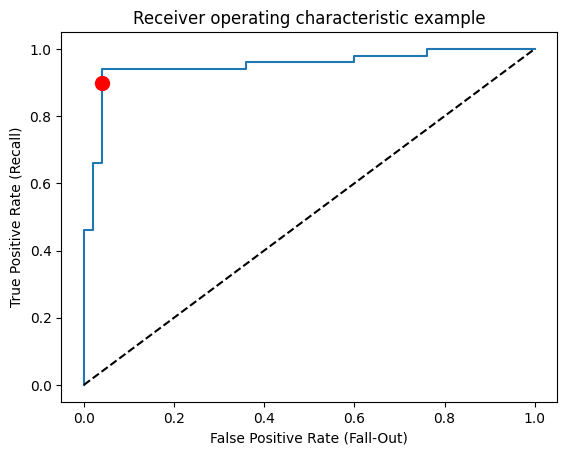

In [ ]:
import matplotlib.pyplot as plt

recall = recall_score(y, y_pred)
fallout = 1-recall_score(y, y_pred, pos_label=0)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0,1], 'k--', label='random guess')
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05] ,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X,y)
pred1 = model1.predict(X)

In [ ]:
from sklearn.svm import SVC
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)
pred2 = model2.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred1))

[[940   3]
 [ 30  27]]


In [ ]:
print(confusion_matrix(y, pred2))

[[940   3]
 [ 30  27]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [ ]:
print(classification_report(y, pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



<function matplotlib.pyplot.show(close=None, block=None)>

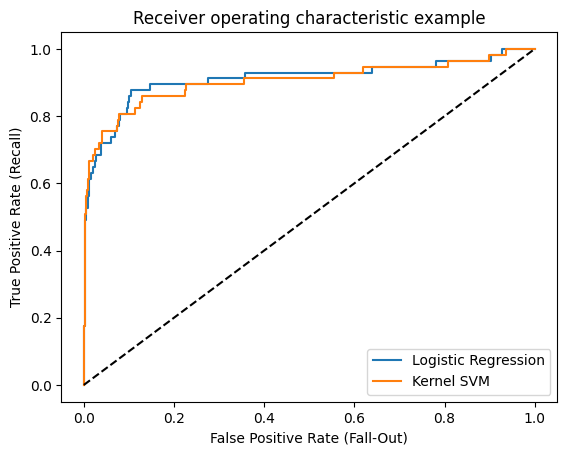

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1],[0, 1], 'k--', label='random guess')
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05] ,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X,y)

In [ ]:
from sklearn.svm import SVC
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)

In [ ]:
from sklearn.metrics import roc_auc_score
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

In [ ]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0,1,2])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
fpr = [None]*3
tpr = [None]*3
thr = [None]*3
roc_auc = [None]*3

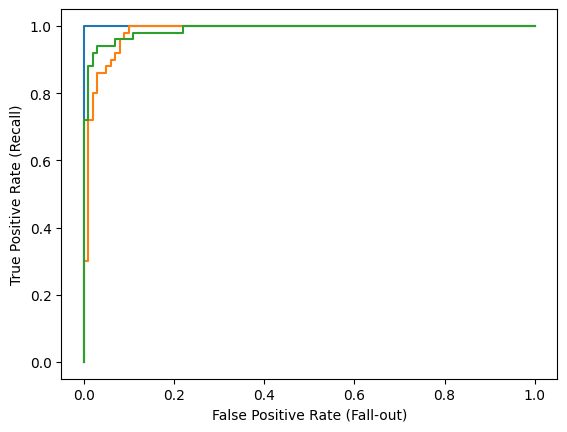

In [ ]:
for i in range(3):
    model = GaussianNB().fit(X, y[:,i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(X)[:,1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
name = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0), # arc
            make_circles(noise=0.2, factor=0.5, random_state=1), # circle
            linearly_separable # linear
            ]

In [ ]:
figure = plt.figure(figsize=(30, 10))
h = .02 # 격자 단계
i = 1

# 데이터셋들 마다 반복
for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습 데이터와 평가 데이터로 나눈다.
    X, y = ds
    X = StandardScaler().fit_transform(X)
    train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 분류기들 마다 반복